<a href="https://www.kaggle.com/code/notshrirang/music-recommender-using-pair-similarities?scriptVersionId=154280810" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
songs = pd.read_csv('/kaggle/input/spotify-million-song-dataset/spotify_millsongdata.csv')

In [6]:
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [7]:
songs = songs.sample(n=20000).drop('link', axis=1).reset_index(drop=True)
songs['text'] = songs['text'].str.replace(r'\n', '', regex=True)

In [8]:
songs.head()

,artist,song,text
0,Korn,Another Brick In The Wall,Daddy's flown across the ocean \rLeaving just...
1,Scorpions,We Let It Rock...You Let It Roll,We come to you through a storm of lightning \...
2,Kenny Chesney,Makes Me Wonder,"Stepped off the airplane, I saw your face \rI..."
3,Nicki Minaj,Last Chance,Yo I coulda' been had fame \rJump shot with a...
4,Olivia Newton-John,I Think I'll Say Goodbye,I never tried to change you \rBut the hurt is...


In [27]:
text_input = """We're only gettin' older, baby
And I've been thinkin' about it lately
Does it ever drive you crazy
Just how fast the night changes?
Everything that you've ever dreamed of
Disappearing when you wake up
But there's nothing to be afraid of
Even when the night changes
It will never change me and you"""

In [29]:
songs2: pd.DataFrame = songs.append(songs.iloc[0])
songs2.loc[songs2.index[-1], 'text'] = text_input
songs2.loc[songs2.index[-1], 'song'] = "Input_Song"
songs2

,artist,song,text
0,Korn,Input_Song,"We're only gettin' older, baby\nAnd I've been ..."
1,Scorpions,We Let It Rock...You Let It Roll,We come to you through a storm of lightning \...
2,Kenny Chesney,Makes Me Wonder,"Stepped off the airplane, I saw your face \rI..."
3,Nicki Minaj,Last Chance,Yo I coulda' been had fame \rJump shot with a...
4,Olivia Newton-John,I Think I'll Say Goodbye,I never tried to change you \rBut the hurt is...
...,...,...,...
19996,Usher,I.F.U.,I bet you feelin' me stare \rThe moment is re...
19997,Steve Miller Band,God Bless The Child,Them that's got shall get \rThem that's not s...
19998,Otis Redding,Chained And Bound,"Darling now, you made me change my mind \rCan..."
19999,Lil Wayne,Break Up,"Nice tires on da ghini, \rYou should wanna ki..."


In [30]:
documents = [f for f in songs['text']]
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
lyrics_matrix = tfidf.fit_transform(documents)
# print(lyrics_matrix, lyrics_matrix.shape)

In [31]:
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = songs[0:10]['song']
  df.index = songs[0:10]['song']
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

In [32]:
cosine_similarities = cosine_similarity(lyrics_matrix)

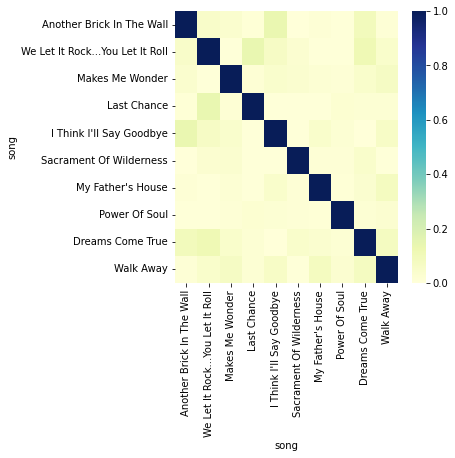

In [33]:
create_heatmap(similarity= cosine_similarities[0:10, 0:10])

In [34]:
similarities = {}

for i in range(len(cosine_similarities)):
    similar_indices = cosine_similarities[i].argsort()[:-50:-1]
    similarities[songs2['song'].iloc[i]] = [(cosine_similarities[i][x], songs2['song'][x], songs2['artist'][x]) for x in similar_indices][1:]

In [35]:
class Recommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]}")
            print("--------------------")
        
    def recommend(self, recommendation):
        song = recommendation['song']
        number_songs = recommendation['number_songs']
        recom_song = self.matrix_similar[song][:number_songs]
        self._print_message(song=song, recom_song=recom_song)

In [36]:
recommender = Recommender(similarities)

In [37]:
import pickle
with open('recommender.pkl', 'wb') as f:
    pickle.dump(recommender, f)

In [39]:
query = {
    "song": songs['song'].iloc[-1],
    "number_songs": 5
}
recommender.recommend(query)

The 5 recommended songs are:
Number 1:
I Like It Like That by Van Morrison
--------------------
Number 2:
Joker(Cover) by Incubus
--------------------
Number 3:
When I Feel Like It by Fabolous
--------------------
Number 4:
3 Peat by Lil Wayne
--------------------
Number 5:
Only Girl In The World by One Direction
--------------------


In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

class Recommender:
    def __init__(self, matrix, songs):
        self.matrix_similar = matrix
        self.songs = songs

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        display_text = ""
        print(f'The {rec_items} recommended songs are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]}")
            print("--------------------")
            display_text += f"\nNumber {i+1}:\n{recom_song[i][1]} by {recom_song[i][2]}\n--------------------"
        return display_text
        
    def recommend(self, recommendation):
        text_input = recommendation['text']
        number_songs = recommendation['number_songs']
        text_input = text_input.replace(r'\n', '')
        input_vector = tfidf.transform([text_input])
        similarities = cosine_similarity(input_vector, lyrics_matrix)
        similar_indices = similarities.argsort()[0][::-1][:number_songs]
        recom_song = [(similarities[0][x], self.songs['song'][x], self.songs['artist'][x]) for x in similar_indices]

        return self._print_message(song="Input_Song", recom_song=recom_song)

songs = pd.read_csv('/kaggle/input/spotify-million-song-dataset/spotify_millsongdata.csv')
songs = songs.sample(n=20000).drop('link', axis=1).reset_index(drop=True)
songs['text'] = songs['text'].str.replace(r'\n', '', regex=True)

documents = [f for f in songs['text']]
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
lyrics_matrix = tfidf.fit_transform(documents)

with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('lyrics_matrix.pkl', 'wb') as f:
    pickle.dump(lyrics_matrix, f)

recommender = Recommender(similarities, songs)
with open('recommender.pkl', 'wb') as f:
    pickle.dump(recommender, f)

with open('recommender.pkl', 'rb') as f:
    recommender = pickle.load(f)

query = {
    "text": """We're only gettin' older, baby
    And I've been thinkin' about it lately
    Does it ever drive you crazy
    Just how fast the night changes?
    Everything that you've ever dreamed of
    Disappearing when you wake up
    But there's nothing to be afraid of
    Even when the night changes
    It will never change me and you""",
    "number_songs": 5
}
recommender.recommend(query)

The 5 recommended songs are:
Number 1:
Nothing Ever Changes My Love For You by Nat King Cole
--------------------
Number 2:
Changes by Neil Young
--------------------
Number 3:
Silent Warrior by Enigma
--------------------
Number 4:
Winds Of Change by Cinderella
--------------------
Number 5:
Children Of The World by Bee Gees
--------------------


'\nNumber 1:\nNothing Ever Changes My Love For You by Nat King Cole\n--------------------\nNumber 2:\nChanges by Neil Young\n--------------------\nNumber 3:\nSilent Warrior by Enigma\n--------------------\nNumber 4:\nWinds Of Change by Cinderella\n--------------------\nNumber 5:\nChildren Of The World by Bee Gees\n--------------------'

In [55]:
with open('/kaggle/working/recommender.pkl', 'rb') as f:
    recommender = pickle.load(f)

# Example recommendation
query = {
    "text": """She's been my queen
Since we were sixteen
We want the same things
We dream the same dreams
I got it all
'Cause she is the one
Her mum calls me love
Her dad calls me son
Alright, alright
I know, I know, I know for sure
Everybody wanna steal my girl
Everybody wanna take her heart away
Couple billion in the whole wide world
Find another one 'cause she belongs to me""",
    "number_songs": 5
}
recommender.recommend(query)

The 5 recommended songs are:
Number 1:
Know Your Name by Ne-Yo
--------------------
Number 2:
It's Alright by Ray Charles
--------------------
Number 3:
Alright Now by Michael Jackson
--------------------
Number 4:
All Alright by Fun.
--------------------
Number 5:
When She Calls Me Baby by Kenny Chesney
--------------------


"\nNumber 1:\nKnow Your Name by Ne-Yo\n--------------------\nNumber 2:\nIt's Alright by Ray Charles\n--------------------\nNumber 3:\nAlright Now by Michael Jackson\n--------------------\nNumber 4:\nAll Alright by Fun.\n--------------------\nNumber 5:\nWhen She Calls Me Baby by Kenny Chesney\n--------------------"